## Exploratory data analysis

In [44]:
#Import libraries
import sys
import json
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.filterwarnings('ignore')

## Load Ultimate data

In [2]:
ultimate_data = json.load((open('ultimate_data_challenge.json')))
ultimate_data_df = pd.DataFrame(ultimate_data)
display(ultimate_data_df.head())
print(ultimate_data_df.shape)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


(50000, 12)


## Data Exploration

In [3]:
ultimate_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [4]:
ultimate_data_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [5]:
ultimate_data_df.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [6]:
ultimate_data_df.phone.value_counts(normalize=True)

iPhone     0.697162
Android    0.302838
Name: phone, dtype: float64

In [7]:
ultimate_data_df.ultimate_black_user.value_counts(normalize=True)

False    0.62292
True     0.37708
Name: ultimate_black_user, dtype: float64

In [8]:
print("Earliest last trip date: ", ultimate_data_df.last_trip_date.sort_values().min())
print("Latest last trip date: ", ultimate_data_df.last_trip_date.sort_values().max())

Earliest last trip date:  2014-01-01
Latest last trip date:  2014-07-01


In [9]:
print("Earliest Sign up date: ", ultimate_data_df.signup_date.sort_values().min())
print("Latest Sign up date: ", ultimate_data_df.signup_date.sort_values().max())

Earliest Sign up date:  2014-01-01
Latest Sign up date:  2014-01-31


## Convert last trip date to numeric and define those happened between 2014-06-01 and 2014-07-01 as retained = 1, else retained = 0.

In [10]:
retain = []
for i in range(50000):
    if int(ultimate_data_df.last_trip_date.values[i][6]) >= 6:
        retain.append(1)
    else:
        retain.append(0)

In [11]:
retain = pd.Series(retain)

In [12]:
ultimate_data_df['retained'] = retain

In [13]:
ultimate_data_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


## Percentage of retained users in their 6th month on the system is 37.6%

In [14]:
print("% of retained users in their 6th month on the system: ")
ultimate_data_df.retained.value_counts(normalize=True)

% of retained users in their 6th month on the system: 


0    0.62392
1    0.37608
Name: retained, dtype: float64

#### Check the relationship between variable "retained" and "ultimate_black_user". Looks like these 2 variables match in most records, only on a small portion of the records they disagree.

In [15]:
tmp = pd.crosstab(ultimate_data_df['ultimate_black_user'], ultimate_data_df['retained'])
tmp

retained,0,1
ultimate_black_user,,
False,21839,9307
True,9357,9497


#### Impute missing values using median for the 2 numeric variables, and impute missing values in "phone" using majority class.

In [16]:
ultimate_data_df['avg_rating_by_driver'] = ultimate_data_df['avg_rating_by_driver'].fillna(ultimate_data_df['avg_rating_by_driver'].median())

In [17]:
ultimate_data_df['avg_rating_of_driver'] = ultimate_data_df['avg_rating_of_driver'].fillna(ultimate_data_df['avg_rating_of_driver'].median())

In [18]:
ultimate_data_df['phone'] = ultimate_data_df['phone'].fillna('iPhone')

In [19]:
ultimate_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
 12  retained                50000 non-null  int64  
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 4.6+ MB


In [20]:
ultimate_data_df.phone.value_counts(normalize=True)

iPhone     0.69956
Android    0.30044
Name: phone, dtype: float64

### Visualize distributions of some numeric variables in the dataset

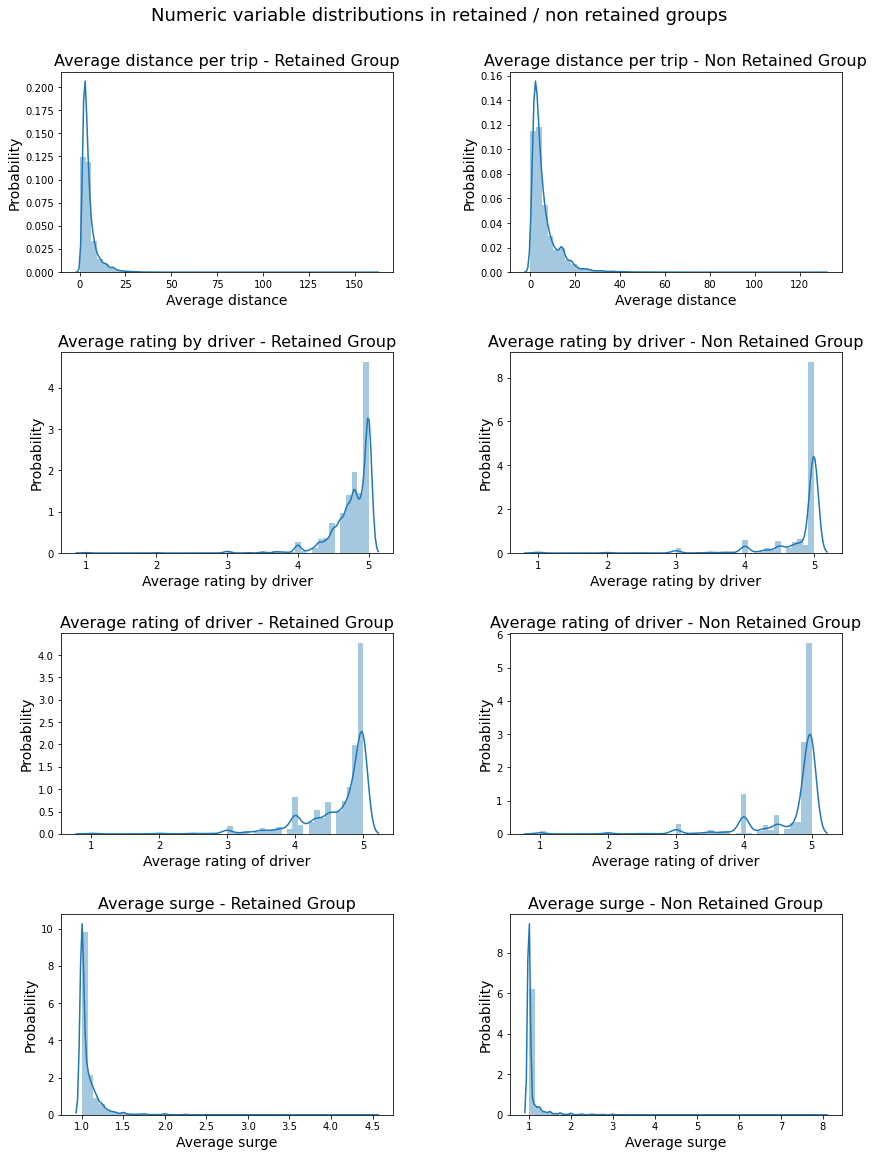

In [21]:
import seaborn as sns

plt.figure(figsize=(14,18))
plt.suptitle('Numeric variable distributions in retained / non retained groups', fontsize=18)

plt.subplot(421)
g = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==1)]['avg_dist'])
g.set_title("Average distance per trip - Retained Group", fontsize=16)
g.set_xlabel("Average distance", fontsize=14)
g.set_ylabel("Probability", fontsize=14)

plt.subplot(422)
g1 = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==0)]['avg_dist'])
g1.set_title("Average distance per trip - Non Retained Group", fontsize=16)
g1.set_xlabel("Average distance", fontsize=14)
g1.set_ylabel("Probability", fontsize=14)

plt.subplot(423)
g = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==1)]['avg_rating_by_driver'])
g.set_title("Average rating by driver - Retained Group", fontsize=16)
g.set_xlabel("Average rating by driver", fontsize=14)
g.set_ylabel("Probability", fontsize=14)

plt.subplot(424)
g1 = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==0)]['avg_rating_by_driver'])
g1.set_title("Average rating by driver - Non Retained Group", fontsize=16)
g1.set_xlabel("Average rating by driver", fontsize=14)
g1.set_ylabel("Probability", fontsize=14)

plt.subplot(425)
g = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==1)]['avg_rating_of_driver'])
g.set_title("Average rating of driver - Retained Group", fontsize=16)
g.set_xlabel("Average rating of driver", fontsize=14)
g.set_ylabel("Probability", fontsize=14)

plt.subplot(426)
g1 = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==0)]['avg_rating_of_driver'])
g1.set_title("Average rating of driver - Non Retained Group", fontsize=16)
g1.set_xlabel("Average rating of driver", fontsize=14)
g1.set_ylabel("Probability", fontsize=14)

plt.subplot(427)
g = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==1)]['avg_surge'])
g.set_title("Average surge - Retained Group", fontsize=16)
g.set_xlabel("Average surge", fontsize=14)
g.set_ylabel("Probability", fontsize=14)

plt.subplot(428)
g1 = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==0)]['avg_surge'])
g1.set_title("Average surge - Non Retained Group", fontsize=16)
g1.set_xlabel("Average surge", fontsize=14)
g1.set_ylabel("Probability", fontsize=14)

plt.subplots_adjust(hspace = 0.4, wspace = 0.35, top = 0.93)
plt.show()

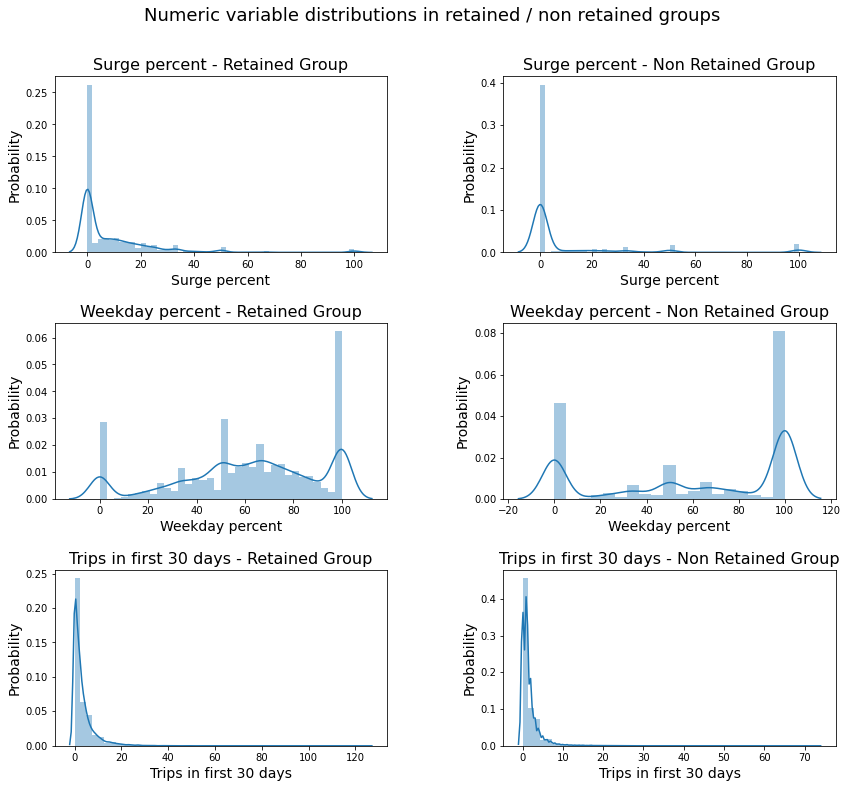

In [22]:
plt.figure(figsize=(14,12))
plt.suptitle('Numeric variable distributions in retained / non retained groups', fontsize=18)

plt.subplot(321)
g = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==1)]['surge_pct'])
g.set_title("Surge percent - Retained Group", fontsize=16)
g.set_xlabel("Surge percent", fontsize=14)
g.set_ylabel("Probability", fontsize=14)

plt.subplot(322)
g1 = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==0)]['surge_pct'])
g1.set_title("Surge percent - Non Retained Group", fontsize=16)
g1.set_xlabel("Surge percent", fontsize=14)
g1.set_ylabel("Probability", fontsize=14)

plt.subplot(323)
g = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==1)]['weekday_pct'])
g.set_title("Weekday percent - Retained Group", fontsize=16)
g.set_xlabel("Weekday percent", fontsize=14)
g.set_ylabel("Probability", fontsize=14)

plt.subplot(324)
g1 = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==0)]['weekday_pct'])
g1.set_title("Weekday percent - Non Retained Group", fontsize=16)
g1.set_xlabel("Weekday percent", fontsize=14)
g1.set_ylabel("Probability", fontsize=14)

plt.subplot(325)
g = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==1)]['trips_in_first_30_days'])
g.set_title("Trips in first 30 days - Retained Group", fontsize=16)
g.set_xlabel("Trips in first 30 days", fontsize=14)
g.set_ylabel("Probability", fontsize=14)

plt.subplot(326)
g1 = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==0)]['trips_in_first_30_days'])
g1.set_title("Trips in first 30 days - Non Retained Group", fontsize=16)
g1.set_xlabel("Trips in first 30 days", fontsize=14)
g1.set_ylabel("Probability", fontsize=14)

plt.subplots_adjust(hspace = 0.4, wspace = 0.35, top = 0.9)
plt.show()

### Check correlations of some numeric variables in the dataset

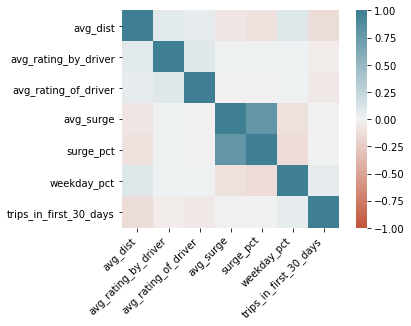

In [23]:
tt = ultimate_data_df[['avg_dist','avg_rating_by_driver','avg_rating_of_driver',
                'avg_surge','surge_pct','weekday_pct','trips_in_first_30_days']]
corr = tt.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

retained            city  Non Retained   Retained
0                Astapor     74.428450  25.571550
1         King's Landing     37.186575  62.813425
2             Winterfell     64.805451  35.194549


(0.0, 64.67551926563482)

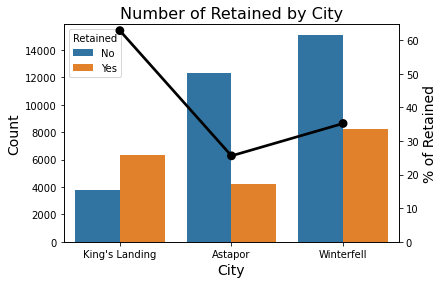

In [21]:
tmp = pd.crosstab(ultimate_data_df['city'], ultimate_data_df['retained'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'Non Retained', 1:'Retained'}, inplace=True)
print(tmp)

g = sns.countplot(x='city', data=ultimate_data_df, hue='retained')
g.set_title("Number of Retained by City", fontsize=16)
g.set_xlabel("City", fontsize=14)
g.set_ylabel('Count', fontsize=14)
plt.legend(title='Retained', loc='best', labels=['No', 'Yes'])
gt = g.twinx()
gt = sns.pointplot(x='city', y='Retained', data=tmp, color='black', order=["King's Landing",'Astapor','Winterfell'], legend=False)
gt.set_ylabel("% of Retained", fontsize=14)
gt.set_ylim(0,)

retained    phone  Non Retained   Retained
0         Android     79.057383  20.942617
1          iPhone     55.234719  44.765281


(0.0, 45.95641421076522)

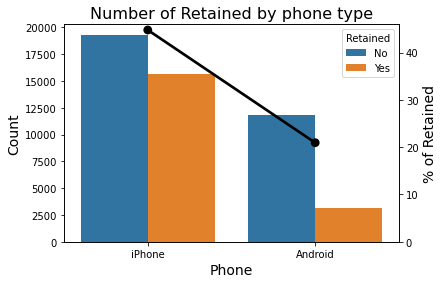

In [22]:
tmp = pd.crosstab(ultimate_data_df['phone'], ultimate_data_df['retained'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'Non Retained', 1:'Retained'}, inplace=True)
print(tmp)

g = sns.countplot(x='phone', data=ultimate_data_df, hue='retained')
g.set_title("Number of Retained by phone type", fontsize=16)
g.set_xlabel("Phone", fontsize=14)
g.set_ylabel('Count', fontsize=14)
plt.legend(title='Retained', loc='best', labels=['No', 'Yes'])
gt = g.twinx()
gt = sns.pointplot(x='phone', y='Retained', data=tmp, color='black', order=['iPhone','Android'], legend=False)
gt.set_ylabel("% of Retained", fontsize=14)
gt.set_ylim(0,)

retained  ultimate_black_user  Non Retained   Retained
0                       False     70.118153  29.881847
1                        True     49.628726  50.371274


(0.0, 0.05500000000000001)

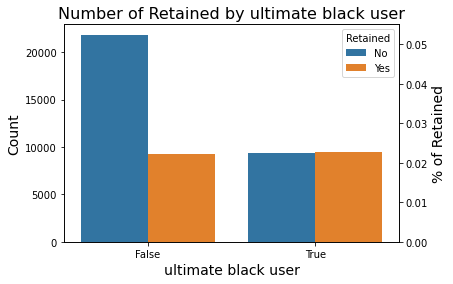

In [23]:
tmp = pd.crosstab(ultimate_data_df['ultimate_black_user'], ultimate_data_df['retained'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'Non Retained', 1:'Retained'}, inplace=True)
print(tmp)

g = sns.countplot(x='ultimate_black_user', data=ultimate_data_df, hue='retained')
g.set_title("Number of Retained by ultimate black user", fontsize=16)
g.set_xlabel("ultimate black user", fontsize=14)
g.set_ylabel('Count', fontsize=14)
plt.legend(title='Retained', loc='best', labels=['No', 'Yes'])
gt = g.twinx()
gt = sns.pointplot(x='ultimate_black_user', y='Retained', data=tmp, color='black', order=['False','True'], legend=False)
gt.set_ylabel("% of Retained", fontsize=14)
gt.set_ylim(0,)

#### Use one-hot encoding to transform 3 categorical variables (city, phone, ultimate_black_user) and prepare the final columns for modeling. Note that I will drop sign up dates and last trip dates from the datasets as they are all signed up within the same month, and last trip dates is already used in defining target variable.

In [24]:
droplist = ['signup_date','last_trip_date']
ultimate_data_df.drop(droplist, axis=1, inplace=True)

In [25]:
ultimate_data_df = pd.get_dummies(ultimate_data_df, columns=['city','phone'])

In [26]:
ultimate_data_df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,1,0,1,0,0,1
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,0,1,0,0,1,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,0,1,0,0,0,1
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,1,0,1,0,0,1
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,0,0,0,1,1,0


In [27]:
ultimate_data_df = pd.get_dummies(ultimate_data_df, columns=['ultimate_black_user'])
ultimate_data_df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,0,1,0,0,1,0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,1,0,0,1,0,1,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,1,0,0,0,1,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,0,1,0,0,1,0,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,0,1,1,0,1,0


###  Predictive model

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from xgboost.sklearn import XGBClassifier
#from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

from sklearn.model_selection import train_test_split

In [29]:
# train test split using test_size = 0.2 
X = ultimate_data_df.drop('retained',axis=1)
y = ultimate_data_df['retained']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)
print(X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 14) (50000,) (40000, 14) (40000,) (10000, 14) (10000,)


In [30]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=123, shuffle=True)
kf.get_n_splits(X_train)

i = 1
for train_index, val_index in kf.split(X_train):
    print(f"Fold {i}: ", "Train:", train_index, "Validation:", val_index)
    i = i + 1

Fold 1:  Train: [    0     2     3 ... 39996 39997 39999] Validation: [    1    15    19 ... 39988 39994 39998]
Fold 2:  Train: [    0     1     2 ... 39997 39998 39999] Validation: [    8    12    21 ... 39966 39989 39995]
Fold 3:  Train: [    0     1     2 ... 39997 39998 39999] Validation: [    3     9    10 ... 39991 39992 39993]
Fold 4:  Train: [    0     1     3 ... 39996 39997 39998] Validation: [    2     5     6 ... 39986 39990 39999]
Fold 5:  Train: [    1     2     3 ... 39995 39998 39999] Validation: [    0     4    13 ... 39978 39996 39997]


## Random Forest

In [45]:
import time
start = time.process_time()

niter, verbose, random_state = [5, 0, 123] 
param_space = {'n_estimators': range(100,500,100), 'max_depth': range(1,10)} 

clf = RandomForestClassifier(random_state=random_state)
cv_clf = RandomizedSearchCV(clf, param_space, cv=kf, n_iter=niter, scoring='roc_auc', return_train_score=True, 
                            verbose=verbose, n_jobs=-1) 
cv_clf.fit(X_train, y_train)

print('completed in {} s'.format(time.process_time() - start))

completed in 5.853640000000006 s


In [46]:
candidate_params = cv_clf.cv_results_['params']
print("1. Five candidate parameters are: ", candidate_params)
best_n = cv_clf.best_params_['n_estimators']
best_d = cv_clf.best_params_['max_depth']
print("2. Best number of trees and depth are: {} and {}".format(best_n, best_d))
best_score = cv_clf.best_score_
print("3. Best average CV validation score is: ", best_score)
std_of_best_score = cv_clf.cv_results_['std_test_score'][max(enumerate(cv_clf.cv_results_['mean_test_score']),key=(lambda x: x[1]))[0]]
print("4. Standard Deviation of Best average CV validation score is: ", std_of_best_score)
mean_test_score = cv_clf.cv_results_['mean_test_score']
print("5. Average CV validation score: ", mean_test_score)
std_test_score = cv_clf.cv_results_['std_test_score']
print("6. Standard Deviation of CV validation score: ", std_test_score)
mean_train_score = cv_clf.cv_results_['mean_train_score']
print("7. Average CV training score: ", mean_train_score)
std_train_score = cv_clf.cv_results_['std_train_score']
print("8. Standard Deviation of CV training score: ", std_train_score)

print("1st fold validation score: ", cv_clf.cv_results_['split0_test_score'])
print("2nd fold validation score: ", cv_clf.cv_results_['split1_test_score'])
print("3rd fold validation score: ", cv_clf.cv_results_['split2_test_score'])
print("4th fold validation score: ", cv_clf.cv_results_['split3_test_score'])
print("5th fold validation score: ", cv_clf.cv_results_['split4_test_score'])
print("1st fold training score: ", cv_clf.cv_results_['split0_train_score'])
print("2nd fold training score: ", cv_clf.cv_results_['split1_train_score'])
print("3rd fold training score: ", cv_clf.cv_results_['split2_train_score'])
print("4th fold training score: ", cv_clf.cv_results_['split3_train_score'])
print("5th fold training score: ", cv_clf.cv_results_['split4_train_score'])


1. Five candidate parameters are:  [{'n_estimators': 100, 'max_depth': 1}, {'n_estimators': 400, 'max_depth': 4}, {'n_estimators': 100, 'max_depth': 8}, {'n_estimators': 400, 'max_depth': 7}, {'n_estimators': 100, 'max_depth': 7}]
2. Best number of trees and depth are: 100 and 8
3. Best average CV validation score is:  0.8461233390785585
4. Standard Deviation of Best average CV validation score is:  0.0016919826160151463
5. Average CV validation score:  [0.78317141 0.82845785 0.84612334 0.84354528 0.84334931]
6. Standard Deviation of CV validation score:  [0.00477958 0.00232974 0.00169198 0.00155605 0.00157157]
7. Average CV training score:  [0.78331639 0.82965858 0.86086121 0.85188906 0.85174665]
8. Standard Deviation of CV training score:  [0.00111582 0.00036565 0.00053954 0.00037914 0.00030884]
1st fold validation score:  [0.78561374 0.82935396 0.84716162 0.84427814 0.84387379]
2nd fold validation score:  [0.77968445 0.82722306 0.84705822 0.84441827 0.84423804]
3rd fold validation s

### Summary: Random Forest: Using AUC as criteria, the best average CV score achieved is 0.8464

#### Xgboost

In [33]:
import time
start = time.process_time()

niter, verbose, random_state = [5, 0, 123] 
param_space = {'n_estimators': range(100,500,100), 'learning_rate': [0.01,0.1,0.5], 
               'max_depth': range(1,10), 'gamma': [0.001,0.01,1,10]}
               
clf = XGBClassifier(objective='binary:logistic', verbosity=verbose, booster='gbtree', tree_method='auto', 
                            subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, 
                            reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=random_state)
cv_clf = RandomizedSearchCV(clf, param_space, cv=kf, n_iter=niter, scoring='roc_auc', return_train_score=True, 
                            verbose=verbose, n_jobs=-1)
cv_clf.fit(X_train, y_train)

print('completed in {} s'.format(time.process_time() - start))


completed in 21.945312 s


In [34]:
candidate_params = cv_clf.cv_results_['params']
print("1. Five candidate parameters are: ", candidate_params)
best_n = cv_clf.best_params_['n_estimators']
best_d = cv_clf.best_params_['max_depth']
best_lr = cv_clf.best_params_['learning_rate']
best_gamma = cv_clf.best_params_['gamma']
print("2. Best number of trees, depth, learning rate, gamma are: {} and {}".format(best_n, best_d, best_lr, best_gamma))
best_score = cv_clf.best_score_
print("3. Best average CV validation score is: ", best_score)
std_of_best_score = cv_clf.cv_results_['std_test_score'][max(enumerate(cv_clf.cv_results_['mean_test_score']),key=(lambda x: x[1]))[0]]
print("4. Standard Deviation of Best average CV validation score is: ", std_of_best_score)
mean_test_score = cv_clf.cv_results_['mean_test_score']
print("5. Average CV validation score: ", mean_test_score)
std_test_score = cv_clf.cv_results_['std_test_score']
print("6. Standard Deviation of CV validation score: ", std_test_score)
mean_train_score = cv_clf.cv_results_['mean_train_score']
print("7. Average CV training score: ", mean_train_score)
std_train_score = cv_clf.cv_results_['std_train_score']
print("8. Standard Deviation of CV training score: ", std_train_score)

print("1st fold validation score: ", cv_clf.cv_results_['split0_test_score'])
print("2nd fold validation score: ", cv_clf.cv_results_['split1_test_score'])
print("3rd fold validation score: ", cv_clf.cv_results_['split2_test_score'])
print("4th fold validation score: ", cv_clf.cv_results_['split3_test_score'])
print("5th fold validation score: ", cv_clf.cv_results_['split4_test_score'])
print("1st fold training score: ", cv_clf.cv_results_['split0_train_score'])
print("2nd fold training score: ", cv_clf.cv_results_['split1_train_score'])
print("3rd fold training score: ", cv_clf.cv_results_['split2_train_score'])
print("4th fold training score: ", cv_clf.cv_results_['split3_train_score'])
print("5th fold training score: ", cv_clf.cv_results_['split4_train_score'])

1. Five candidate parameters are:  [{'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 10}, {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 1}, {'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.001}, {'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.01}, {'n_estimators': 300, 'max_depth': 1, 'learning_rate': 0.5, 'gamma': 10}]
2. Best number of trees, depth, learning rate, gamma are: 200 and 3
3. Best average CV validation score is:  0.8558741245905555
4. Standard Deviation of Best average CV validation score is:  0.0017647241472942305
5. Average CV validation score:  [0.84579081 0.85587412 0.85213848 0.85492143 0.84472353]
6. Standard Deviation of CV validation score:  [0.0015953  0.00176472 0.001644   0.00140658 0.0012368 ]
7. Average CV training score:  [0.84810528 0.86390293 0.86088178 0.88316325 0.84579923]
8. Standard Deviation of CV training score:  [0.00041798 0.00034006 0.00056808 0.00070812 0.

### Summary: Xgboost: Using AUC as criteria, the best average CV score achieved is 0.8558

### Logistic Regression


In [42]:
import time
start = time.process_time()

niter, verbose, random_state = [5, 0, 123] 
param_space = {'penalty': ['l1','l2'], 'C': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1, 10, 100]}
        
clf = LogisticRegression(random_state=random_state)
cv_clf = RandomizedSearchCV(clf, param_space, cv=kf, n_iter=niter, scoring='roc_auc', return_train_score=True, 
                            verbose=verbose, n_jobs = -1) 
cv_clf.fit(X_train, y_train)

print('completed in {} s'.format(time.process_time() - start))

completed in 2.070758000000005 s


In [43]:
candidate_params = cv_clf.cv_results_['params']
print("1. Five candidate parameters are: ", candidate_params)
best_n = cv_clf.best_params_['penalty']
best_d = cv_clf.best_params_['C']
print("2. Best number of trees and depth are: {} and {}".format(best_n, best_d))
best_score = cv_clf.best_score_
print("3. Best average CV validation score is: ", best_score)
std_of_best_score = cv_clf.cv_results_['std_test_score'][max(enumerate(cv_clf.cv_results_['mean_test_score']),key=(lambda x: x[1]))[0]]
print("4. Standard Deviation of Best average CV validation score is: ", std_of_best_score)
mean_test_score = cv_clf.cv_results_['mean_test_score']
print("5. Average CV validation score: ", mean_test_score)
std_test_score = cv_clf.cv_results_['std_test_score']
print("6. Standard Deviation of CV validation score: ", std_test_score)
mean_train_score = cv_clf.cv_results_['mean_train_score']
print("7. Average CV training score: ", mean_train_score)
std_train_score = cv_clf.cv_results_['std_train_score']
print("8. Standard Deviation of CV training score: ", std_train_score)

print("1st fold validation score: ", cv_clf.cv_results_['split0_test_score'])
print("2nd fold validation score: ", cv_clf.cv_results_['split1_test_score'])
print("3rd fold validation score: ", cv_clf.cv_results_['split2_test_score'])
print("4th fold validation score: ", cv_clf.cv_results_['split3_test_score'])
print("5th fold validation score: ", cv_clf.cv_results_['split4_test_score'])
print("1st fold training score: ", cv_clf.cv_results_['split0_train_score'])
print("2nd fold training score: ", cv_clf.cv_results_['split1_train_score'])
print("3rd fold training score: ", cv_clf.cv_results_['split2_train_score'])
print("4th fold training score: ", cv_clf.cv_results_['split3_train_score'])
print("5th fold training score: ", cv_clf.cv_results_['split4_train_score'])

1. Five candidate parameters are:  [{'penalty': 'l1', 'C': 0.005}, {'penalty': 'l1', 'C': 0.001}, {'penalty': 'l2', 'C': 0.0005}, {'penalty': 'l2', 'C': 0.1}, {'penalty': 'l1', 'C': 0.01}]
2. Best number of trees and depth are: l2 and 0.1
3. Best average CV validation score is:  0.760871130218682
4. Standard Deviation of Best average CV validation score is:  nan
5. Average CV validation score:  [       nan        nan 0.75575725 0.76087113        nan]
6. Standard Deviation of CV validation score:  [       nan        nan 0.00309306 0.00363132        nan]
7. Average CV training score:  [       nan        nan 0.75602881 0.7610491         nan]
8. Standard Deviation of CV training score:  [       nan        nan 0.00085931 0.00084619        nan]
1st fold validation score:  [       nan        nan 0.75207125 0.75577328        nan]
2nd fold validation score:  [       nan        nan 0.76029684 0.76701552        nan]
3rd fold validation score:  [       nan        nan 0.75306527 0.75950433        n

### Summary: Logistic Regression: Using AUC as criteria, the best average CV score achieved is 0.7608

#### Conclusion: We will chose Xgboost as the final model due to its highest AUC among the 3 models we built. Visualize its feature importance chart on the training set and evaluate its performance on independent Test set.

In [44]:
clf = XGBClassifier(n_estimators = best_n, learning_rate = best_lr, max_depth = best_d, 
                            gamma = best_gamma, objective='binary:logistic', booster='gbtree', tree_method='auto', 
                            subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, 
                            reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, 
                            random_state = random_state)

In [47]:
clf.fit(X_train, y_train)

### The top 2 features selected are: driving rating and city.

In [47]:
# plot the top M feature importances
import numpy as np
M = 10
importances = clf.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(M), importances[indices][-M:], color='b', align='center')
plt.yticks(range(M), [features[i] for i in indices[-M:]])
plt.xlabel('Relative Importance')
plt.show()

NotFittedError: need to call fit or load_model beforehand

## Confusion matrix, AUC and ROC for test dataset

In [48]:
import sklearn
preds = clf.predict(X_test)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, preds, labels=None, sample_weight=None)
report = classification_report(y_test, preds)
probs = clf.predict_proba(X_test)
auc = roc_auc_score(y_test, probs[:,1])
accuracy = float(np.sum(preds==y_test))/y_test.shape[0] 

print("Confusion Matrix is: \n", confusion_matrix)
print("Classification Report: \n", report)
print("accuracy: %f" % (accuracy))
print("AUC: ", auc)

NotFittedError: need to call fit or load_model beforehand

In [49]:
# plot ROC curve
y_score = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

NameError: name 'probs' is not defined